In [38]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import matplotlib.patches as patches
from scipy.integrate import simpson
from scipy.signal import find_peaks
import json

# Frequenzspektrum und Gesamtenergie eines Audiofiles

In [ ]:
audio_file = 'test.mp3' 
y, sr = librosa.load(audio_file, sr=None)

fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(fft_magnitude), 1/sr)
mask = frequencies >= 0

total_energy = np.sum(fft_magnitude[mask]**2) / len(y)

print(f"Gesamtenergie des Audiosignals: {total_energy:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(frequencies[mask], fft_magnitude[mask])
plt.title('Frequenzspektrum des Audiofiles')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 2000) 
plt.grid(True)
plt.show()


# Frequenzanalyse und Energieberechnung eines Audiosignals

Das dargestellte Ergebnis ist ein Frequenzspektrum, das zeigt, wie sich die Energie eines Audiosignals über verschiedene Frequenzen verteilt. Auf der horizontalen Achse sind die Frequenzen in Hertz (Hz) abgetragen, während die vertikale Achse die Amplituden der entsprechenden Frequenzanteile anzeigt.

## Fourier-Transformation

Das ursprüngliche Audiosignal, das in der Zeitdomäne vorliegt, wird mittels der **diskreten Fourier-Transformation (DFT)** in den Frequenzbereich überführt. Dabei wird das Signal als Summe von Sinus- und Kosinuswellen unterschiedlicher Frequenzen dargestellt. Die mathematische Formel lautet:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i\, 2\pi \frac{k \cdot n}{N}}
$$

wobei:
- \( x[n] \) das zeitdiskrete Audiosignal ist,
- \( N \) die Gesamtanzahl der Signalproben darstellt,
- \( X[k] \) der komplexe Fourier-Koeffizient für den Frequenzindex \( k \) ist.

Um die Stärke der einzelnen Frequenzanteile zu ermitteln, wird der Betrag (die Norm) der komplexen Fourier-Koeffizienten berechnet:

$$
|X[k]| = \sqrt{\Re(X[k])^2 + \Im(X[k])^2}
$$

Da reale Signale ein symmetrisches Spektrum aufweisen, werden üblicherweise nur die positiven Frequenzen betrachtet.

## Energieberechnung

Die Gesamtenergie eines Signals kann über die quadrierten Amplituden berechnet werden. Dank des **Parsevalschen Theorems** gilt:

$$
E = \frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2 = \sum_{k=0}^{N-1} |X[k]|^2
$$

Im Frequenzbereich wird dabei die Energie aus den quadrierten Amplituden (Beträgen) der Fourier-Koeffizienten berechnet. Betrachtet man nur die positiven Frequenzen, wird die Gesamtenergie wie folgt bestimmt:

$$
\text{Gesamtenergie} = \frac{1}{N}\sum_{k \in \text{positiv}} |X[k]|^2
$$

## Zusammenfassung

- **Transformation:** Das zeitabhängige Signal wird in den Frequenzraum transformiert, indem es als Summe von Schwingungen unterschiedlicher Frequenzen dargestellt wird.
- **Spektrumanalyse:** Die Amplituden der einzelnen Frequenzen werden durch die Berechnung der Beträge der Fourier-Koeffizienten bestimmt.
- **Energieberechnung:** Durch Quadrieren und Aufsummieren der Amplituden (unter Beachtung der Symmetrie des Spektrums) erhält man ein Maß für die Gesamtenergie des Signals.
- **Visualisierung:** Das Frequenzspektrum zeigt grafisch die Verteilung der Energie über verschiedene Frequenzbereiche, sodass dominierende Frequenzen – beispielsweise im interessierenden Bereich von 0 bis 2000 Hz – sofort erkennbar sind.


# Segmentierung des Audiofiles

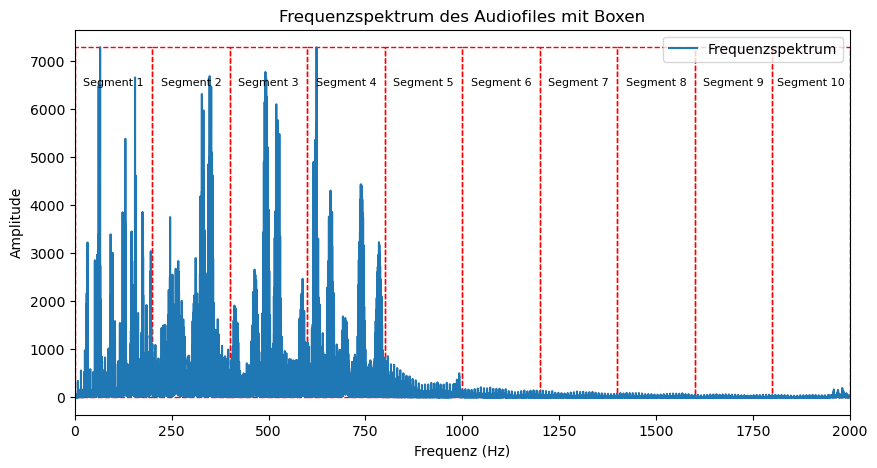

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import librosa

audio_file = 'test.mp3'  # Ersetze diesen Pfad durch deinen tatsächlichen Dateinamen

# Lade das Audiofile (sr=None behält die originale Abtastrate)
y, sr = librosa.load(audio_file, sr=None)

# Berechne die FFT des Audiosignals
fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(fft_magnitude), 1/sr)

# Filtere die positiven Frequenzen
mask = frequencies >= 0

# Plot des Frequenzspektrums
plt.figure(figsize=(10, 5))
plt.plot(frequencies[mask], fft_magnitude[mask], label='Frequenzspektrum')
plt.title('Frequenzspektrum des Audiofiles mit Boxen')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 2000)

# Anzahl der Boxen, in die die Frequenzachse unterteilt werden soll
n_boxes = 10
x_min, x_max = 0, 2000
box_width = (x_max - x_min) / n_boxes

# Für die Höhe nutzen wir den maximalen Amplitudenwert im betrachteten Frequenzbereich
ax = plt.gca()
max_amplitude = np.max(fft_magnitude[mask])

for i in range(n_boxes):
    box_start = x_min + i * box_width
    # Erzeuge das Rechteck, das das Segment darstellt
    rect = patches.Rectangle((box_start, 0), box_width, max_amplitude,
                             fill=False, edgecolor='red', lw=1, linestyle='--')
    ax.add_patch(rect)
    
    # Füge in jedem Segment einen Text hinzu (z.B. "Segment 1", "Segment 2", ...)
    plt.text(box_start + box_width/2, max_amplitude * 0.9, f"Segment {i+1}",
             horizontalalignment='center', verticalalignment='center',
             color='black', fontsize=8)

plt.legend()
plt.show()


# Frequenzspektrum in \( n \) Segmenten unterteilen

Die vorgestellte Methode analysiert ein Audiosignal, transformiert es in den Frequenzbereich und teilt anschließend den angezeigten Frequenzbereich in \( n \) gleich große Segmente (Boxen) ein. Dabei wird das Frequenzspektrum visualisiert und zugleich mathematisch in Teilabschnitte zerlegt.

## 1. Fourier-Transformation

Zunächst wird das zeitabhängige Audiosignal \( x[n] \) mittels der diskreten Fourier-Transformation (DFT) in den Frequenzbereich überführt:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i\, 2\pi \frac{k \cdot n}{N}}
$$

wobei  
- \( x[n] \) das zeitdiskrete Signal ist,  
- \( N \) die Anzahl der Signalproben darstellt,  
- \( X[k] \) der komplexe Fourier-Koeffizient für den Frequenzindex \( k \) ist.

## 2. Berechnung des Amplitudenspektrums

Um die Stärke der einzelnen Frequenzanteile zu bestimmen, wird der Betrag der Fourier-Koeffizienten berechnet:

$$
|X[k]| = \sqrt{\Re(X[k])^2 + \Im(X[k])^2}
$$

Da reale Signale ein symmetrisches Spektrum aufweisen, werden typischerweise nur die positiven Frequenzen betrachtet.

## 3. Unterteilung des Frequenzbereichs in \( n \) Segmente

Der betrachtete Frequenzbereich, beispielsweise von \( x_{\min} = 0 \) Hz bis \( x_{\max} = 2000 \) Hz, wird in \( n \) gleich große Bereiche unterteilt. Die Breite einer Box \( W \) berechnet sich durch:

$$
W = \frac{x_{\max} - x_{\min}}{n}
$$

Für jedes Segment \( i \) (wobei \( i = 0, 1, 2, \dots, n-1 \)) gilt dann:

$$
x_{\text{start}, i} = x_{\min} + i \cdot W
$$

Somit wird der gesamte Frequenzbereich in \( n \) Bereiche aufgeteilt, die jeweils die gleiche Breite haben.


# Beschreibung der `compute_max_segments` Funktion

Die Funktion `compute_max_segments` berechnet die maximal mögliche Anzahl an Segmenten, in die der Frequenzbereich eines Audiosignals unterteilt werden kann. Dies erfolgt basierend auf der Frequenzauflösung des Signals. Dabei wird sichergestellt, dass die Breite jedes Segments mindestens der Frequenzauflösung entspricht, sodass in jedem Segment genügend Frequenzinformation vorhanden ist, um ein aussagekräftiges Integral des Spektrums zu berechnen.

## Mathematischer Hintergrund

1. **Frequenzauflösung:**  
   Nach dem Laden des Audiosignals wird die Frequenzauflösung \(\Delta f\) ermittelt, die angibt, wie groß der Frequenzabstand zwischen zwei benachbarten Punkten im Spektrum ist. Sie berechnet sich wie folgt:
   
   $$
   \Delta f = \frac{sr}{N}
   $$
   
   Hierbei ist:
   - \( sr \) die Abtastrate des Signals,
   - \( N \) die Anzahl der Signalproben.

2. **Berechnung der maximal möglichen Segmente:**  
   Für einen definierten Frequenzbereich von \( x_{\min} \) bis \( x_{\max} \) wird die maximal mögliche Anzahl an Segmenten berechnet, indem der Gesamtfrequenzbereich durch die Frequenzauflösung geteilt wird:
   
   $$
   \text{max\_segments\_possible} = \frac{x_{\max} - x_{\min}}{\Delta f}
   $$
   
   Der Wert wird anschließend in einen ganzzahligen Wert umgewandelt, um die Anzahl der sinnvollen Segmente zu erhalten.

## Quellcode der Funktion

```python
def compute_max_segments(audio_file, x_min, x_max):
    y, sr = librosa.load(audio_file, sr=None)
    delta_f = sr / len(y)
    max_segments_possible = int((x_max - x_min) / delta_f)
    return max_segments_possible
```

## Zusammenfassung

- **Transformation:** Das zeitabhängige Signal wird mittels DFT in den Frequenzraum transformiert.
- **Spektrumanalyse:** Durch Berechnung der Beträge der Fourier-Koeffizienten erhält man das Amplitudenspektrum.
- **Segmentierung:** Der Frequenzbereich (z.B. von 0 bis 2000 Hz) wird in n gleich große Segmente unterteilt








# Berechnung Segmentfläche und Integralfläche

C:\Users\Dell\AppData\Local\Temp\ipykernel_2592\4286130952.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


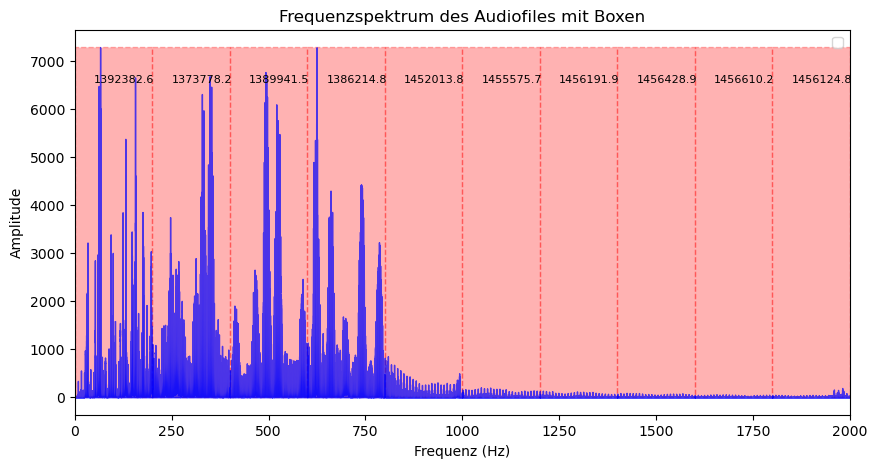

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import librosa

audio_file = 'test.mp3'  # Ersetze diesen Pfad durch deinen tatsächlichen Dateinamen

y, sr = librosa.load(audio_file, sr=None)

# Berechne die FFT des Audiosignals
fft_result = np.fft.fft(y)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(fft_magnitude), 1/sr)

# Filtere die positiven Frequenzen
mask = frequencies >= 0
freqs = frequencies[mask]
magnitudes = fft_magnitude[mask]

# Plot des Frequenzspektrums
plt.figure(figsize=(10, 5))
plt.title('Frequenzspektrum des Audiofiles mit Boxen')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 2000)  # Frequenzbereich anpassen, falls benötigt

# Anzahl der Boxen, in die die Frequenzachse unterteilt werden soll
n_boxes = 10
x_min, x_max = 0, 2000
box_width = (x_max - x_min) / n_boxes

# Berechne den maximalen Amplitudenwert im betrachteten Frequenzbereich
max_amplitude = np.max(magnitudes)

ax = plt.gca()
for i in range(n_boxes):
    box_start = x_min + i * box_width
    box_end = box_start + box_width

    # Rechtecksfläche (ideale Integralfläche)
    rect_area = box_width * max_amplitude
    
    # Filtere die Frequenzwerte im aktuellen Segment
    indices = np.where((freqs >= box_start) & (freqs < box_end))
    freqs_segment = freqs[indices]
    magnitudes_segment = magnitudes[indices]
    
    # Berechne die Fläche unter der Spektrumskurve im Segment (Trapezregel)
    spectrum_area = np.trapz(magnitudes_segment, freqs_segment) if len(freqs_segment) > 1 else 0
    
    # Differenz zwischen Rechtecksfläche und Spektrumfläche
    area_difference = rect_area - spectrum_area

    # Zeichne das gefüllte Rechteck für die ideale Fläche (rot, halbtransparent, hinter)
    rect_patch = patches.Rectangle((box_start, 0), box_width, max_amplitude,
                                   facecolor='red', alpha=0.3,
                                   edgecolor='red', lw=1, linestyle='--', zorder=1)
    ax.add_patch(rect_patch)
    
    # Zeichne die Fläche unter der Spektrumskurve als lightblue vor dem Rechteck (höherer zorder)
    if len(freqs_segment) > 0:
        ax.fill_between(freqs_segment, magnitudes_segment, color='blue', alpha=0.7, zorder=2)
    
    # Zeige die Flächendifferenz als Text in der Box
    plt.text(box_start + box_width/4, max_amplitude * 0.9, f"{area_difference:.1f}",
             color='black', fontsize=8, zorder=3)

plt.legend()
plt.show()


# Beschreibung der Frequenzspektrumsegmentierung und Flächenberechnung

Der vorgestellte Vorgang unterteilt das Frequenzspektrum eines Audiosignals in \( n \) gleich große Segmente und vergleicht für jedes Segment die ideale Rechtecksfläche mit der tatsächlich integrierten Fläche unter der Spektrumskurve. Dabei wird mittels der Trapezregel die Fläche der Kurve im jeweiligen Frequenzintervall numerisch bestimmt und von der idealen Fläche subtrahiert.

## 4. Flächenberechnung im Segment

### Ideale Rechtecksfläche

Für jedes Segment wird zunächst eine ideale Rechtecksfläche als Referenz festgelegt. Diese Fläche wird durch die maximale Amplitude \( A_{\text{max}} \) im betrachteten Frequenzbereich multipliziert mit der Segmentbreite \( W \) definiert:

$$
\text{Fläche}_{\text{Rechteck}} = W \times A_{\text{max}}
$$

### Integrierte Spektrumfläche

Die tatsächliche Fläche unter der Spektrumskurve im jeweiligen Segment wird durch numerische Integration (hier mittels der Trapezregel) bestimmt:

$$
\text{Fläche}_{\text{Spektrum}} = \int_{\text{Start}_i}^{\text{Ende}_i} |X(f)| \, df
$$

wobei \( |X(f)| \) die Amplitude des Spektrums in Abhängigkeit von der Frequenz \( f \) ist.

## 5. Differenzbildung

Die Differenz zwischen der idealen Rechtecksfläche und der integrierten Spektrumfläche gibt an, wie groß der Flächenunterschied im jeweiligen Segment ist. Diese Differenz wird berechnet als:

$$
\Delta A_i = \text{Fläche}_{\text{Rechteck}} - \text{Fläche}_{\text{Spektrum}}
$$

Der Wert \( \Delta A_i \) wird anschließend für jedes Segment im Plot als Text dargestellt, um die Abweichung zwischen der idealen und der real gemessenen Energieverteilung im Frequenzbereich zu veranschaulichen.

## Zusammenfassung

- **Transformation:** Das Audiosignal wird in den Frequenzraum transformiert, um das Amplitudenspektrum zu erhalten.
- **Spektrumanalyse:** Es wird das Amplitudenspektrum berechnet, indem die Beträge der Fourier-Koeffizienten ermittelt werden.
- **Segmentierung:** Der Frequenzbereich (z.B. von 0 bis 2000 Hz) wird in \( n \) gleich große Segmente unterteilt, wobei die Breite jedes Segments \( W = \frac{2000}{n} \) beträgt.
- **Flächenberechnung:** Für jedes Segment wird die ideale Rechtecksfläche \( W \times A_{\text{max}} \) als Referenz berechnet, und die tatsächliche Fläche unter der Spektrumskurve wird mittels Trapezregel integriert.
- **Differenzbildung:** Die Differenz \( \Delta A_i = \text{Fläche}_{\text{Rechteck}} - \text{Fläche}_{\text{Spektrum}} \) zeigt den Flächenunterschied im Segment und wird zur Visualisierung in den Plot eingeblendet.

# Fingerprint als verkettete Liste. Erstellung eines Audio Fingerprints.

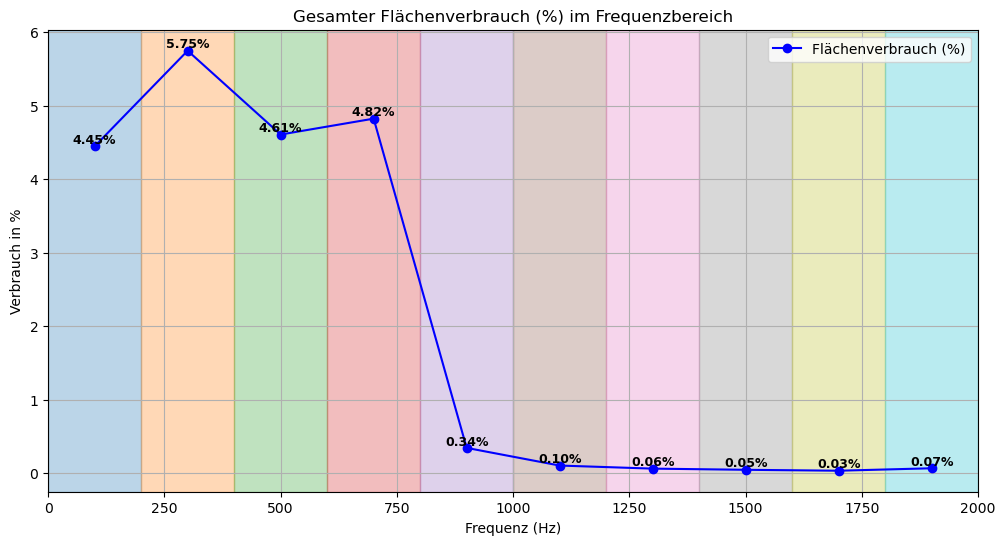

In [ ]:
# Parameter
N_SEGMENTS = 10
X_MIN, X_MAX = 0, 2000  # Frequenzbereich in Hz

# Hilfsfunktion zur Berechnung der maximal möglichen Segmente basierend auf der Frequenzauflösung
def compute_max_segments(audio_file, x_min, x_max):
    y, sr = librosa.load(audio_file, sr=None)
    delta_f = sr / len(y)
    max_segments_possible = int((x_max - x_min) / delta_f)
    return max_segments_possible

# Definition der Segment-Node-Klasse für die verkettete Liste
class SegmentNode:
    def __init__(self, index, seg_start, seg_end, usage_percent, actual_area):
        self.index = index                  # Index des Segments
        self.seg_start = seg_start          # Startfrequenz des Segments
        self.seg_end = seg_end              # Endfrequenz des Segments
        self.usage_percent = usage_percent  # Anteil der idealen Fläche, der gefüllt ist (in %)
        self.actual_area = actual_area      # Tatsächliche Integralfläche im Segment
        self.prev = None                    # Zeiger auf das vorherige Segment
        self.next = None                    # Zeiger auf das nächste Segment

    def to_dict(self):
        return {
            "index": self.index,
            "seg_start": self.seg_start,
            "seg_end": self.seg_end,
            "usage_percent": self.usage_percent,
            "actual_area": self.actual_area,
            "prev": self.prev.index if self.prev else None,
            "next": self.next.index if self.next else None
        }

    def __repr__(self):
        return (f"SegmentNode(index={self.index}, start={self.seg_start}, end={self.seg_end}, "
                f"usage_percent={self.usage_percent:.2f}%, actual_area={self.actual_area:.2f}, "
                f"prev={self.prev.index if self.prev else None}, "
                f"next={self.next.index if self.next else None})")

def create_segment_linked_list(audio_file, n_segments, x_min=X_MIN, x_max=X_MAX):
    """
    Das Audiofile wird im Frequenzbereich von x_min bis x_max in n_segments unterteilt.
    Für jedes Segment wird das Integral des Spektrums berechnet.
    Der usage_percent wird als (actual_area / ideal_area)*100 berechnet, wobei
    ideal_area = (Segmentbreite) * (maximale Amplitude des Spektrums) ist.
    """
    y, sr = librosa.load(audio_file, sr=None)
    fft_result = np.fft.rfft(y)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.rfftfreq(len(y), 1/sr)
    
    box_width = (x_max - x_min) / n_segments
    max_amplitude = np.max(fft_magnitude)
    ideal_area = box_width * max_amplitude  # Referenzfläche
    
    head = None
    prev_node = None
    nodes = []
    
    for i in range(n_segments):
        seg_start = x_min + i * box_width
        seg_end = seg_start + box_width
        
        start_idx = np.searchsorted(frequencies, seg_start, side='left')
        end_idx = np.searchsorted(frequencies, seg_end, side='left')
        if end_idx > start_idx:
            actual_area = simpson(y=fft_magnitude[start_idx:end_idx],
                                  x=frequencies[start_idx:end_idx])
        else:
            actual_area = 0
        
        usage_percent = (actual_area / ideal_area) * 100 if ideal_area != 0 else 0
        
        node = SegmentNode(index=i, seg_start=seg_start, seg_end=seg_end,
                           usage_percent=usage_percent, actual_area=actual_area)
        if prev_node is not None:
            prev_node.next = node
            node.prev = prev_node
        else:
            head = node
        prev_node = node
        nodes.append(node)
        
    return head, nodes

def save_fingerprint_to_json(nodes, json_filename):
    """
    Speichert den Fingerprint (verkettete Liste) als JSON.
    """
    fingerprint = [node.to_dict() for node in nodes]
    with open(json_filename, 'w') as f:
        json.dump(fingerprint, f, indent=4)

def load_fingerprint_from_json(json_filename):
    with open(json_filename, 'r') as f:
        fingerprint = json.load(f)
    return fingerprint

def plot_usage_in_frequency(fingerprint):
    """
    Visualisiert die usage_percent-Kurve des Audiofiles im Frequenzbereich.
    Es werden nur die Usage-Werte als Linie mit Punkten und farbige Segmente dargestellt.
    """
    centers = []
    for seg in fingerprint:
        center = (seg["seg_start"] + seg["seg_end"]) / 2
        centers.append(center)
    
    usage_values = [seg["usage_percent"] for seg in fingerprint]
    
    plt.figure(figsize=(12, 6))
    
    # Plot der Usage (%) Kurve mit Punkten
    plt.plot(centers, usage_values, marker='o', linestyle='-', color='blue', label='Flächenverbrauch (%)')
    
    # Farbige Segmente einfügen
    cmap = plt.get_cmap('tab10')  # Colormap mit bis zu 10 unterschiedlichen Farben
    for seg in fingerprint:
        color = cmap(seg["index"] % 10)  # Farbe basierend auf dem Segmentindex
        plt.axvspan(seg["seg_start"], seg["seg_end"], color=color, alpha=0.3)
    
    # Annotations: Anzeige der Usage-Prozentzahl an den Punkten
    for center, usage in zip(centers, usage_values):
        plt.text(center, usage, f"{usage:.2f}%", 
                 horizontalalignment='center', verticalalignment='bottom', 
                 fontsize=9, fontweight='bold', color='black')
    
    plt.title("Gesamter Flächenverbrauch (%) im Frequenzbereich")
    plt.xlabel("Frequenz (Hz)")
    plt.ylabel("Verbrauch in %")
    plt.xlim(X_MIN, X_MAX)
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Hauptprogramm ---
if __name__ == "__main__":
    # Pfad zum Audiofile
    audio_file = "test.mp3"  # Audiofile
    
    # Berechne die maximal mögliche Segmentanzahl
    max_segments_file = 10  # oder compute_max_segments(audio_file, X_MIN, X_MAX)
    
    if N_SEGMENTS > max_segments_file:
        print(f"Warnung: Gewählte Anzahl an Segmenten ({N_SEGMENTS}) überschreitet die maximal mögliche Anzahl ({max_segments_file}).")
        N_SEGMENTS = max_segments_file
        print(f"Es werden {N_SEGMENTS} Segmente verwendet.")
    
    # Erzeuge den Fingerprint (verkettete Liste) für das Audiofile
    head, nodes = create_segment_linked_list(audio_file, N_SEGMENTS, X_MIN, X_MAX)
    
    # Fingerprint als JSON speichern
    save_fingerprint_to_json(nodes, "fingerprint.json")
    
    fingerprint = [node.to_dict() for node in nodes]
    
    plot_usage_in_frequency(fingerprint)


# Aufbau einer verketteten Liste zur Speicherung der Integralflächen pro Segment

Dieser Prozess unterteilt das Frequenzspektrum eines Audiosignals in mehrere Segmente und speichert für jedes Segment wichtige Informationen in einem Element einer verketteten Liste. Dabei werden sowohl mathematische Berechnungen als auch Datenstrukturen verwendet, um einen "Fingerprint" des Spektrums zu erstellen.

## Aufbau eines Listenelements (SegmentNode)

Jedes Element der verketteten Liste enthält folgende Informationen:

- **index:**  
  Der fortlaufende Index des Segments (z. B. \( 0, 1, 2, \dots \)).

- **seg_start:**  
  Die Startfrequenz des Segments (zum Beispiel \( x_{\min} + i \cdot W \)).

- **seg_end:**  
  Die Endfrequenz des Segments (also \( \text{seg_start} + W \)).

- **usage_percent:**  
  Der Prozentsatz der idealen Fläche, der durch die tatsächliche Fläche unter der Spektrumskurve abgedeckt wird. Dies gibt an, wie "voll" das Segment im Vergleich zum Maximum ist.

- **actual_area:**  
  Die berechnete Integralfläche unter der Spektrumskurve für das jeweilige Segment.

- **prev & next:**  
  Zeiger (Referenzen) auf das vorherige und das nächste Element der Liste. Dies ermöglicht das Durchlaufen der Liste (verkettete Liste).

### Beispielhafte Struktur eines Listenelements

```python
class SegmentNode:
    def __init__(self, index, seg_start, seg_end, usage_percent, actual_area):
        self.index = index                  # Index des Segments
        self.seg_start = seg_start          # Startfrequenz des Segments
        self.seg_end = seg_end              # Endfrequenz des Segments
        self.usage_percent = usage_percent  # Prozentualer Anteil der idealen Fläche, die gefüllt ist
        self.actual_area = actual_area      # Tatsächliche Integralfläche im Segment
        self.prev = None                    # Zeiger auf das vorherige Segment
        self.next = None                    # Zeiger auf das nächste Segment
```




![Beispielbild: Darstellung einer verketteten Liste](./linkedList.png)

![Beispielbild: Darstellung einer verketteten Liste](./linkedList3D.png)


# Verifikation des Fingerprints ~ Audiofile Analyse


Gewichtete Durchschnittliche Differenz: 0.24%
Globaler Durchschnitt (ungewichtetes Mittel): 0.10%


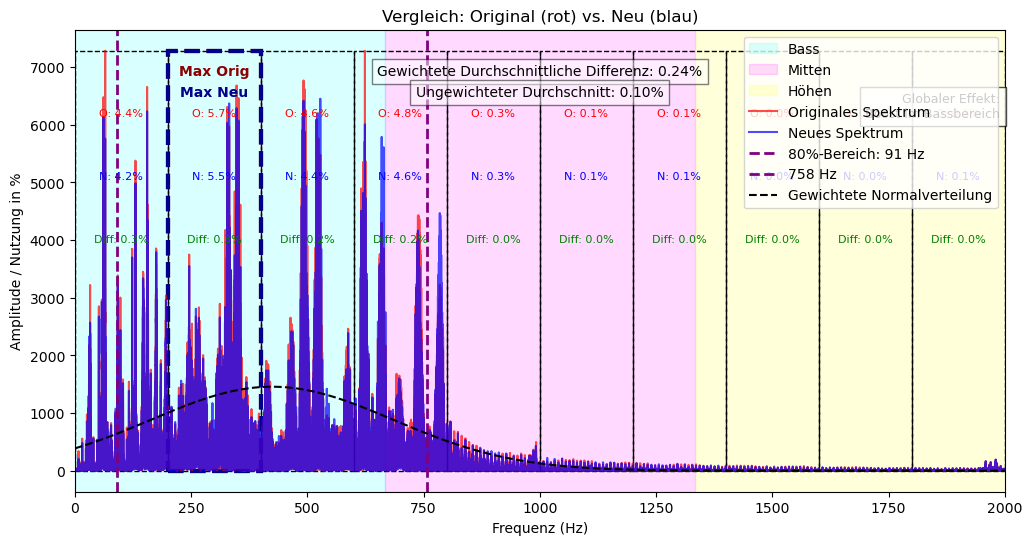


Globaler Audioeffekt basierend auf Nutzungsanteilen der Spektren:
Gewichtete Durchschnittliche Differenz: 0.24%
Vermuteter globaler Effekt: Boost im Bassbereich

80%-Frequenzbereich: 91 Hz bis 758 Hz

Analyse der dynamischen Kennzahlen:
Original RMS: 0.0908, Neues RMS: 0.0861, Änderung: -5.19%
Original Crest-Factor: 4.69, Neuer Crest-Factor: 4.67, Änderung: -0.50%
Delay-Indikator (Anzahl signifikanter Peaks): 8
Vermuteter dynamischer Effekt: Kein eindeutiger dynamischer Effekt


In [57]:
# Parameter
LOCAL_THRESHOLD = 1.0      # für Boost/Cut (in %)
NEW_FILE_THRESHOLD = 5.0  # wenn die Abweichung > 50% liegt, dann "Neues Audiofile"
x_min, x_max = 0, 2000     # Frequenzbereich in Hz

# Hilfsfunktion zur Berechnung der maximal möglichen Boxen basierend auf der Frequenzauflösung
def compute_max_segments(audio_file, x_min, x_max):
    y, sr = librosa.load(audio_file, sr=None)
    delta_f = sr / len(y)
    max_segments_possible = int((x_max - x_min) / delta_f)
    return max_segments_possible

# Datenstruktur für ein Box-Element in der verketteten Liste (nur für das Original)
class BoxNode:
    def __init__(self, index, box_start, box_end, orig_integral):
        self.index = index          # Index des Segments
        self.box_start = box_start  # Startfrequenz des Segments
        self.box_end = box_end      # Endfrequenz des Segments
        self.orig_integral = orig_integral  # Integral (Fläche) des Spektrums im Segment
        self.prev = None            # Verweis auf das vorherige Segment
        self.next = None            # Verweis auf das nächste Segment

    def __repr__(self):
        prev_index = self.prev.index if self.prev else None
        next_index = self.next.index if self.next else None
        return (f"BoxNode(index={self.index}, start={self.box_start}, end={self.box_end}, "
                f"orig_integral={self.orig_integral:.1f}, prev={prev_index}, next={next_index})")

def guess_local_effect(deviation, local_threshold=LOCAL_THRESHOLD, new_file_threshold=NEW_FILE_THRESHOLD):
    if abs(deviation) > new_file_threshold:
        return "Neues Audiofile"
    elif deviation > local_threshold:
        return "Cut"
    elif deviation < local_threshold:
        return "Boost"
    else:
        return "Keine Änderung"

def create_box_linked_list(audio_file, n_boxes, x_min=0, x_max=2000):
    """
    Berechnet pro Segment das Integral (Fläche) des Spektrums und erzeugt eine verkettete Liste von BoxNodes.
    """
    y, sr = librosa.load(audio_file, sr=None)
    fft_result = np.fft.rfft(y)
    fft_magnitude = np.abs(fft_result)
    frequencies_pos = np.fft.rfftfreq(len(y), 1/sr)
    
    box_width = (x_max - x_min) / n_boxes
    # Ideale Boxfläche: Boxbreite * maximale Amplitude im Spektrum
    max_amplitude = np.max(fft_magnitude)
    box_area = box_width * max_amplitude  
    
    head = None
    prev_node = None
    nodes = []
    
    for i in range(n_boxes):
        seg_start = x_min + i * box_width
        seg_end = seg_start + box_width
        
        start_idx = np.searchsorted(frequencies_pos, seg_start, side='left')
        end_idx = np.searchsorted(frequencies_pos, seg_end, side='left')
        integral = simpson(fft_magnitude[start_idx:end_idx], x=frequencies_pos[start_idx:end_idx]) if end_idx > start_idx else 0
        
        node = BoxNode(index=i, box_start=seg_start, box_end=seg_end, orig_integral=integral)
        if prev_node is not None:
            prev_node.next = node
            node.prev = prev_node
        else:
            head = node
        prev_node = node
        nodes.append(node)
        
    return head, nodes, box_area, frequencies_pos, fft_magnitude

def compute_new_integrals(audio_file, n_boxes, x_min=0, x_max=2000):
    """
    Berechnet pro Segment die integrale Fläche (Fläche des Spektrums) für das neue Audiofile.
    """
    y, sr = librosa.load(audio_file, sr=None)
    fft_result = np.fft.rfft(y)
    fft_magnitude = np.abs(fft_result)
    frequencies_pos = np.fft.rfftfreq(len(y), 1/sr)
    
    box_width = (x_max - x_min) / n_boxes
    new_integrals = []
    
    for i in range(n_boxes):
        seg_start = x_min + i * box_width
        seg_end = seg_start + box_width
        
        start_idx = np.searchsorted(frequencies_pos, seg_start, side='left')
        end_idx = np.searchsorted(frequencies_pos, seg_end, side='left')
        integral = simpson(fft_magnitude[start_idx:end_idx], x=frequencies_pos[start_idx:end_idx]) if end_idx > start_idx else 0
        new_integrals.append(integral)
        
    return new_integrals, frequencies_pos, fft_magnitude

# === Hauptprogramm ===

original_audio = "test.mp3"   # Original-Audiofile
new_audio = "low_eq.mp3"         # Neues Audiofile

# Dynamische Anpassung: Berechne die maximal mögliche Anzahl an Boxen anhand des Frequenzspektrums
#max_boxes_orig = compute_max_segments(original_audio, x_min, x_max)
#max_boxes_new = compute_max_segments(new_audio, x_min, x_max)

max_boxes_orig = 10
max_boxes_new = 10

n_boxes = min(max_boxes_orig, max_boxes_new)

# 1) Berechne integrale Flächen pro Segment für das Original
head, nodes, box_area, freq_orig, fft_mag_orig = create_box_linked_list(original_audio, n_boxes, x_min, x_max)

# 2) Berechne integrale Flächen pro Segment für das neue Audiofile
new_integrals, freq_new, fft_mag_new = compute_new_integrals(new_audio, n_boxes, x_min, x_max)

# 3) Plot: Frequenzspektren, Boxen und farbige Hintergründe zeichnen
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Farbliche Hintergründe (Bass, Mitten, Höhen)
bass_end = x_min + (x_max - x_min) / 3
mid_end = x_min + 2 * (x_max - x_min) / 3
ax.axvspan(x_min, bass_end, color='cyan', alpha=0.15, label='Bass')
ax.axvspan(bass_end, mid_end, color='magenta', alpha=0.15, label='Mitten')
ax.axvspan(mid_end, x_max, color='yellow', alpha=0.15, label='Höhen')

# Plot der Frequenzspektren
ax.plot(freq_orig, fft_mag_orig, label='Originales Spektrum', color='red', alpha=0.7)
ax.plot(freq_new, fft_mag_new, label='Neues Spektrum', color='blue', alpha=0.7)

# 4) Vergleich der prozentualen Nutzung der idealen Boxfläche pro Segment
local_effects = []
deviations = []
weights = []
segment_centers = []  # Mittlere Frequenz jedes Segments
usage_orig_list = []
usage_new_list = []

max_amplitude = max(np.max(fft_mag_orig), np.max(fft_mag_new))

for i, node in enumerate(nodes):
    # Berechne den Nutzungsanteil (in %) des Originals und des neuen Files
    usage_orig = (node.orig_integral / box_area) * 100
    usage_new = (new_integrals[i] / box_area) * 100
    
    usage_orig_list.append(usage_orig)
    usage_new_list.append(usage_new)
    
    # Differenz der Nutzungsanteile als Absolutwert
    deviation_usage = abs(usage_new - usage_orig)
    deviations.append(deviation_usage)
    
    local_eff = guess_local_effect(deviation_usage)
    local_effects.append(local_eff)
    
    # Gewichtung: Originalintegral (Segmente mit mehr Fläche haben höhere Gewichtung)
    weights.append(node.orig_integral)
    
    # Mittlere Frequenz des Segments
    center = node.box_start + (node.box_end - node.box_start) / 2
    segment_centers.append(center)
    
    # Zeichne die Boxen (Rechtecke) für das Segment
    rect = patches.Rectangle((node.box_start, 0), (node.box_end - node.box_start), max_amplitude,
                             fill=False, edgecolor='black', lw=1, linestyle='--')
    ax.add_patch(rect)
    
    # Textlabels: Original-, Neue-Nutzung und Differenz
    text_x = center
    ax.text(text_x, max_amplitude*0.85, f"O: {usage_orig:.1f}%", ha='center', va='center', color='red', fontsize=8)
    ax.text(text_x, max_amplitude*0.70, f"N: {usage_new:.1f}%", ha='center', va='center', color='blue', fontsize=8)
    ax.text(text_x, max_amplitude*0.55, f"Diff: {deviation_usage:.1f}%", ha='center', va='center', color='green', fontsize=8)

# Bestimme den Segmentindex mit der höchsten Nutzung (Original und Neu)
max_usage_orig = max(usage_orig_list)
max_usage_new = max(usage_new_list)
max_index_orig = usage_orig_list.index(max_usage_orig)
max_index_new = usage_new_list.index(max_usage_new)

# Markiere das Segment mit der höchsten Nutzung im Plot
highlight_rect_orig = patches.Rectangle((nodes[max_index_orig].box_start, 0), 
                                          (nodes[max_index_orig].box_end - nodes[max_index_orig].box_start), 
                                          max_amplitude,
                                          fill=False, edgecolor='darkred', linewidth=3, linestyle='--')
ax.add_patch(highlight_rect_orig)
ax.text(nodes[max_index_orig].box_start + (nodes[max_index_orig].box_end - nodes[max_index_orig].box_start)/2, 
        max_amplitude*0.95, "Max Orig", ha='center', va='center', color='darkred', fontsize=10, fontweight='bold')

highlight_rect_new = patches.Rectangle((nodes[max_index_new].box_start, 0), 
                                         (nodes[max_index_new].box_end - nodes[max_index_new].box_start), 
                                         max_amplitude,
                                         fill=False, edgecolor='darkblue', linewidth=3, linestyle='--')
ax.add_patch(highlight_rect_new)
ax.text(nodes[max_index_new].box_start + (nodes[max_index_new].box_end - nodes[max_index_new].box_start)/2, 
        max_amplitude*0.90, "Max Neu", ha='center', va='center', color='darkblue', fontsize=10, fontweight='bold')

# Berechnung des gewichteten Durchschnitts der Abweichungen (per Segment)
weighted_avg_deviation = np.sum(np.array(deviations) * np.array(weights)) / (np.sum(weights) + 1e-6)
ax.text(x_min + (x_max - x_min)*0.5, max_amplitude*0.95,
        f'Gewichtete Durchschnittliche Differenz: {weighted_avg_deviation:.2f}%',
        ha='center', va='center', color='black', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5))

# Berechnung des ungewichteten (einfachen) globalen Durchschnitts der Abweichungen
global_mean_deviation = np.mean(deviations)
ax.text(x_min + (x_max - x_min)*0.5, max_amplitude*0.90,
        f'Ungewichteter Durchschnitt: {global_mean_deviation:.2f}%',
        ha='center', va='center', color='black', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5))

print(f"\nGewichtete Durchschnittliche Differenz: {weighted_avg_deviation:.2f}%")
print(f"Globaler Durchschnitt (ungewichtetes Mittel): {global_mean_deviation:.2f}%")

# Globale Effektabschätzung
def guess_effect_from_boxes(deviations, weights):
    weighted_avg = np.sum(np.array(deviations) * np.array(weights)) / np.sum(weights)
    
    n = len(deviations)
    n_third = n // 3
    low_region = deviations[:n_third]
    mid_region = deviations[n_third:2*n_third]
    high_region = deviations[2*n_third:]
    
    mean_low = np.mean(low_region)
    mean_mid = np.mean(mid_region)
    mean_high = np.mean(high_region)
    
    if (abs(mean_low - mean_mid) / (abs(mean_mid)+1e-6) < 0.05 and 
        abs(mean_mid - mean_high) / (abs(mean_high)+1e-6) < 0.05):
        if weighted_avg < 0:
            effect = "Gain-Anhebung"
        else:
            effect = "Gain-Reduktion"
    elif mean_low > mean_mid and mean_low > mean_high:
        effect = "Boost im Bassbereich"
    elif mean_high > mean_mid and mean_high > mean_low:
        effect = "Boost im Hochtonbereich"
    elif mean_mid > mean_low and mean_mid > mean_high:
        effect = "Boost im Mittelfeld oder Kompression"
    else:
        effect = "Kombinierter Effekt oder unklar"
    
    return {
        "weighted_avg_deviation": weighted_avg,
        "global_mean_deviation": np.mean(deviations),
        "mean_low": mean_low,
        "mean_mid": mean_mid,
        "mean_high": mean_high,
        "predicted_effect": effect
    }

effect_info = guess_effect_from_boxes(deviations, weights)
global_effect_text = f"Globaler Effekt:\n{effect_info['predicted_effect']}"
ax.text(x_max - 10, max_amplitude * 0.9, global_effect_text,
        fontsize=9, color='black', va='top', ha='right',
        bbox=dict(facecolor='white', alpha=0.7))

# Berechnung des gewichteten Mittelwerts und der Standardabweichung der Segmentmittelwerte (Frequenz)
weighted_mean_freq = np.sum(np.array(segment_centers) * np.array(weights)) / (np.sum(weights) + 1e-6)
weighted_var_freq = np.sum(np.array(weights) * (np.array(segment_centers) - weighted_mean_freq)**2) / (np.sum(weights) + 1e-6)
weighted_std_freq = np.sqrt(weighted_var_freq)
# Frequenzbereich, der ca. 80% der Amplituden abdeckt (±1.28155 Std)
freq_lower = weighted_mean_freq - 1.28155 * weighted_std_freq
freq_upper = weighted_mean_freq + 1.28155 * weighted_std_freq

# Zeichne vertikale Linien zur Markierung des 80%-Frequenzbereichs
ax.axvline(freq_lower, color='purple', linestyle='--', linewidth=2, label=f'80%-Bereich: {freq_lower:.0f} Hz')
ax.axvline(freq_upper, color='purple', linestyle='--', linewidth=2, label=f'{freq_upper:.0f} Hz')

# Optionale Darstellung einer gewichteten Normalverteilung (über Frequenz) als Kurve
x_vals = np.linspace(x_min, x_max, 500)
gauss = 0.2 * max_amplitude * np.exp(-((x_vals - weighted_mean_freq)**2) / (2 * weighted_std_freq**2))
ax.plot(x_vals, gauss, color='k', linestyle='--', label='Gewichtete Normalverteilung')

plt.title('Vergleich: Original (rot) vs. Neu (blau)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude / Nutzung in %')
plt.xlim(x_min, x_max)
plt.legend(loc='upper right')
plt.show()

print("\nGlobaler Audioeffekt basierend auf Nutzungsanteilen der Spektren:")
print(f"Gewichtete Durchschnittliche Differenz: {weighted_avg_deviation:.2f}%")
print(f"Vermuteter globaler Effekt: {effect_info['predicted_effect']}\n")
print(f"80%-Frequenzbereich: {freq_lower:.0f} Hz bis {freq_upper:.0f} Hz\n")

# Dynamische Analyse (wie gehabt)
def analyze_dynamic_effects(original_audio, new_audio):
    y_orig, sr_orig = librosa.load(original_audio, sr=None)
    y_new, sr_new = librosa.load(new_audio, sr=None)
    
    if sr_orig != sr_new:
        raise ValueError("Die Samplingraten der Audiofiles stimmen nicht überein!")
    
    def compute_dynamic_measures(y):
        rms = np.sqrt(np.mean(y**2))
        peak = np.max(np.abs(y))
        crest = peak / (rms + 1e-6)
        return rms, peak, crest
    
    rms_orig, peak_orig, crest_orig = compute_dynamic_measures(y_orig)
    rms_new, peak_new, crest_new = compute_dynamic_measures(y_new)
    
    rms_change = (rms_new - rms_orig) / (rms_orig + 1e-6)
    crest_change = (crest_new - crest_orig) / (crest_orig + 1e-6)
    
    fft_y_new = np.fft.rfft(y_new)
    power_spectrum = np.abs(fft_y_new)**2
    autocorr = np.fft.irfft(power_spectrum)
    
    min_lag_samples = int(0.01 * sr_new)
    peaks, _ = find_peaks(autocorr, height=0.3 * np.max(autocorr))
    valid_peaks = peaks[peaks >= min_lag_samples]
    delay_indicator = len(valid_peaks)
    
    if crest_change < -0.2:
        dynamic_effect = "Kompression (verringerter Dynamikumfang)"
    elif peak_new > 1.1 * peak_orig:
        dynamic_effect = "Distortion (Clipping/erhöhte Spitzen)"
    elif delay_indicator > 200:
        dynamic_effect = "Delay (periodische Wiederholungen)"
    elif rms_change > 0.2:
        dynamic_effect = "Gain-Erhöhung (Lautstärke erhöht)"
    elif rms_change < -0.2:
        dynamic_effect = "Gain-Reduktion (Lautstärke reduziert)"
    else:
        dynamic_effect = "Kein eindeutiger dynamischer Effekt"
    
    return {
        "rms_orig": rms_orig,
        "rms_new": rms_new,
        "crest_orig": crest_orig,
        "crest_new": crest_new,
        "rms_change": rms_change,
        "crest_change": crest_change,
        "delay_indicator": delay_indicator,
        "predicted_dynamic_effect": dynamic_effect
    }

dynamic_info = analyze_dynamic_effects(original_audio, new_audio)
print("Analyse der dynamischen Kennzahlen:")
print(f"Original RMS: {dynamic_info['rms_orig']:.4f}, Neues RMS: {dynamic_info['rms_new']:.4f}, Änderung: {dynamic_info['rms_change']*100:.2f}%")
print(f"Original Crest-Factor: {dynamic_info['crest_orig']:.2f}, Neuer Crest-Factor: {dynamic_info['crest_new']:.2f}, Änderung: {dynamic_info['crest_change']*100:.2f}%")
print(f"Delay-Indikator (Anzahl signifikanter Peaks): {dynamic_info['delay_indicator']}")
print(f"Vermuteter dynamischer Effekt: {dynamic_info['predicted_dynamic_effect']}")


# Audiofile Analyse

In diesem Notebook wird ein Vergleich zwischen zwei Audiofiles durchgeführt – einem Original und einer neuen Version. Dabei kommen verschiedene mathematische Verfahren zum Einsatz, die grob in folgende Bereiche unterteilt werden:

---

## 3. Integration zur Bestimmung der Energie

- **Numerische Integration:**  
  Innerhalb jedes Frequenzsegments wird das Integral (die Fläche unter der Spektralkurve) berechnet. Hierfür kommt eine Simpson-Regel zum Einsatz, die eine effiziente Methode zur numerischen Approximation von Integralen darstellt.  
  *Mathematisch:*  
  \[
  \text{Integral} \approx \int_{f_1}^{f_2} |X(f)| \, df
  \]
  
- **Vergleich von Energieanteilen:**  
  Die berechneten Integrale pro Segment werden relativ zur idealen Boxfläche in Prozent ausgedrückt, was den "Nutzungsanteil" des Frequenzbands quantifiziert.

---

## 4. Vergleich und Gewichtung der Spektren

- **Abweichungsberechnung:**  
  Für jedes Segment wird die prozentuale Differenz zwischen den Nutzungsanteilen des Original- und des neuen Audios berechnet:
  \[
  \text{Abweichung} = \left| \frac{\text{Nutzung}_{\text{neu}} - \text{Nutzung}_{\text{orig}}}{\text{Boxfläche}} \right| \times 100\%
  \]
  
- **Klassifizierung der Effekte:**  
  Basierend auf vorgegebenen Schwellenwerten werden die Abweichungen in unterschiedliche Effekte (z. B. "Boost", "Cut" oder "Neues Audiofile") eingeordnet.

- **Gewichtete Durchschnittswerte:**  
  Die Abweichungen werden zusätzlich gewichtet, wobei Segmente mit höherer Energie (größeres Integral) stärker in den Gesamtdurchschnitt einfließen. Dies liefert eine robustere globale Einschätzung.

---

## 5. Dynamische Analyse im Zeitbereich

- **Berechnung von RMS, Peak und Crest-Faktor:**  
  Neben der Frequenzanalyse wird auch das dynamische Verhalten untersucht.  
  - **RMS (Root Mean Square):** Gibt den durchschnittlichen Energieinhalt des Signals an.  
    \[
    \text{RMS} = \sqrt{\frac{1}{N}\sum_{n=0}^{N-1} x(n)^2}
    \]
  - **Peak:** Der maximale Amplitudenwert im Signal.
  - **Crest-Faktor:** Das Verhältnis von Peak zu RMS, was Rückschlüsse auf die Signalspitzen ermöglicht.
  
- **Autokorrelation zur Delay-Erkennung:**  
  Durch die Berechnung der Autokorrelationsfunktion des Signals werden periodische Muster (möglicherweise Hinweise auf Delay-Effekte) identifiziert.

- **Vergleich der dynamischen Kennzahlen:**  
  Veränderungen in diesen Kennzahlen (RMS, Crest, Peaks) zwischen dem Original und dem neuen Audio geben Aufschluss darüber, ob etwaige Effekte wie Kompression, Clipping oder Gain-Veränderungen vorliegen.

---

## Zusammenfassung

Insgesamt kombiniert der Code:
- **Spektralanalyse** (Fourier-Transformation und Integration), um den Frequenzinhalt der Audiosignale zu quantifizieren.
- **Segmentierung** in Frequenzbänder, um lokale Unterschiede im Frequenzspektrum zu erfassen.
- **Vergleichende Analysen** (gewichtete und ungewichtete Mittelwerte der Abweichungen), um globale Effekte zu identifizieren.
- **Dynamikanalyse** im Zeitbereich, um Veränderungen in der Signalstärke und -dynamik aufzuspüren.

Diese mathematischen Verfahren ermöglichen es, differenziert zu bestimmen, wie sich das neue Audio im Vergleich zum Original verhält – sei es durch EQ-Anpassungen (Boost/Cut) oder durch dynamische Veränderungen (z. B. Kompression oder Verzerrung).

# Vergleiche zwei Audiofiles anhand von Fingerprints.

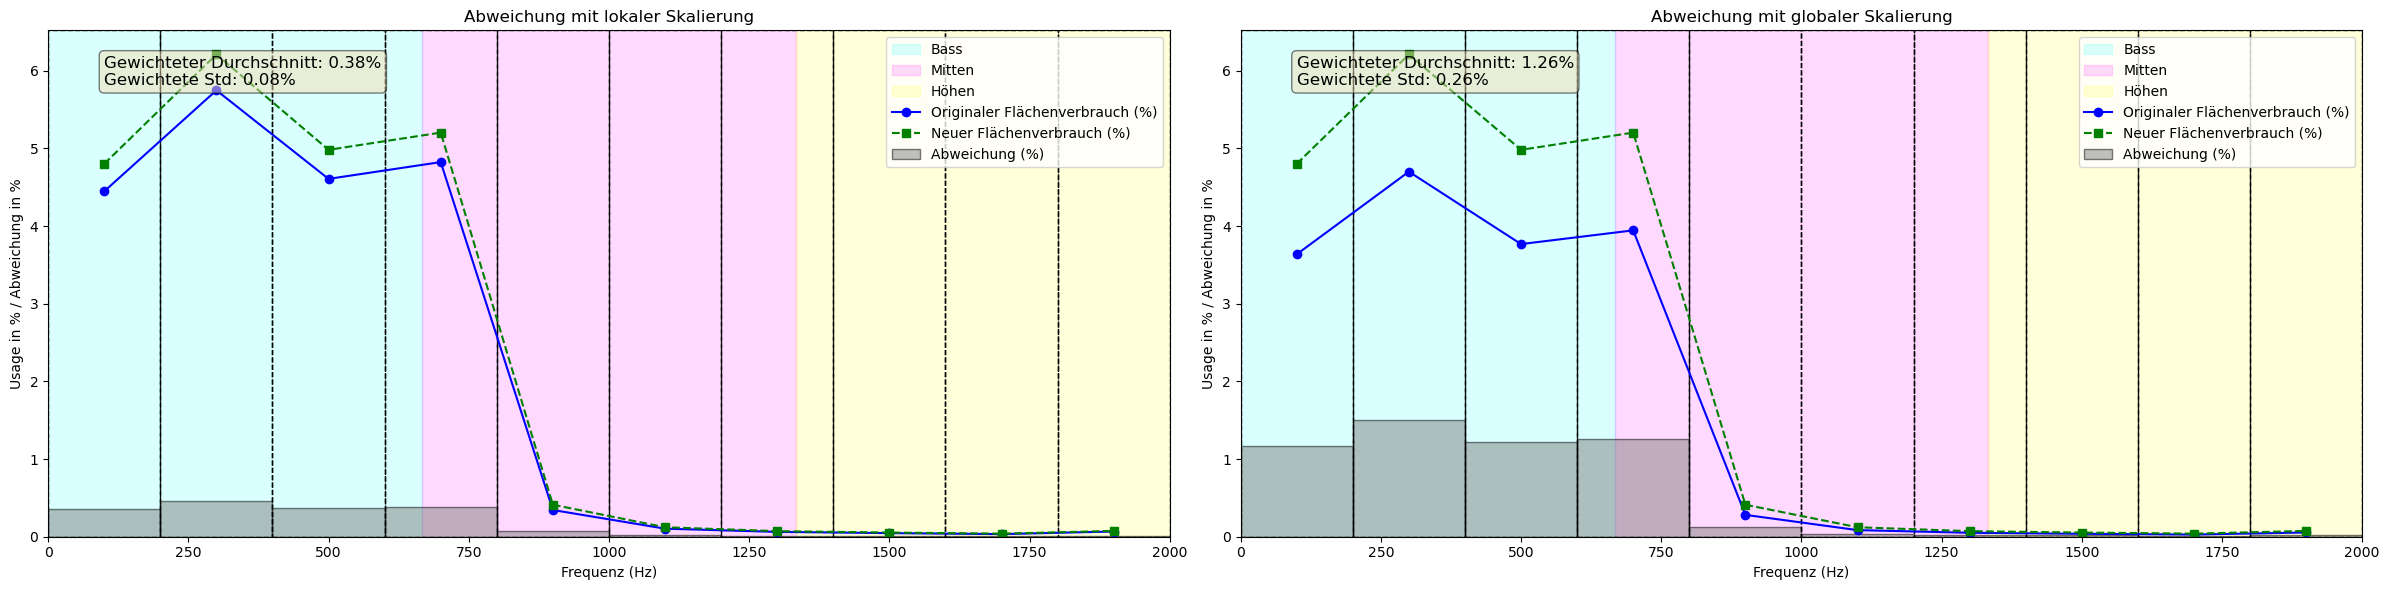

In [69]:
# --- Parameter ---
N_SEGMENTS = 10
X_MIN, X_MAX = 0, 2000  # Frequenzbereich in Hz

def compute_max_segments(audio_file, x_min, x_max):
    y, sr = librosa.load(audio_file, sr=None)
    delta_f = sr / len(y)
    max_segments_possible = int((x_max - x_min) / delta_f)
    return max_segments_possible

# Definition der Segment-Node-Klasse für die verkettete Liste
class SegmentNode:
    def __init__(self, index, seg_start, seg_end, usage_percent, actual_area):
        self.index = index                  # Index des Segments
        self.seg_start = seg_start          # Startfrequenz des Segments
        self.seg_end = seg_end              # Endfrequenz des Segments
        self.usage_percent = usage_percent  # Anteil der idealen Fläche, der gefüllt ist (in %)
        self.actual_area = actual_area      # Tatsächliche Integralfläche im Segment
        self.prev = None                    # Zeiger auf das vorherige Segment
        self.next = None                    # Zeiger auf das nächste Segment

    def to_dict(self):
        return {
            "index": self.index,
            "seg_start": self.seg_start,
            "seg_end": self.seg_end,
            "usage_percent": self.usage_percent,
            "actual_area": self.actual_area,
            "prev": self.prev.index if self.prev else None,
            "next": self.next.index if self.next else None
        }

    def __repr__(self):
        return (f"SegmentNode(index={self.index}, start={self.seg_start}, end={self.seg_end}, "
                f"usage_percent={self.usage_percent:.2f}%, actual_area={self.actual_area:.2f}, "
                f"prev={self.prev.index if self.prev else None}, "
                f"next={self.next.index if self.next else None})")

def create_segment_linked_list(audio_file, n_segments, x_min=X_MIN, x_max=X_MAX, global_max_amp=None):
    y, sr = librosa.load(audio_file, sr=None)
    fft_result = np.fft.rfft(y)
    fft_magnitude = np.abs(fft_result)
    frequencies = np.fft.rfftfreq(len(y), 1/sr)
    
    box_width = (x_max - x_min) / n_segments
    # Verwende global_max_amp, falls angegeben, ansonsten berechne den lokalen Maximalwert
    if global_max_amp is None:
        max_amplitude = np.max(fft_magnitude)
    else:
        max_amplitude = global_max_amp
    ideal_area = box_width * max_amplitude  # Bezugsfläche
    
    head = None
    prev_node = None
    nodes = []
    
    for i in range(n_segments):
        seg_start = x_min + i * box_width
        seg_end = seg_start + box_width
        
        start_idx = np.searchsorted(frequencies, seg_start, side='left')
        end_idx = np.searchsorted(frequencies, seg_end, side='left')
        if end_idx > start_idx:
            actual_area = simpson(fft_magnitude[start_idx:end_idx], x=frequencies[start_idx:end_idx])
        else:
            actual_area = 0
        
        usage_percent = (actual_area / ideal_area) * 100 if ideal_area != 0 else 0
        
        node = SegmentNode(index=i, seg_start=seg_start, seg_end=seg_end,
                           usage_percent=usage_percent, actual_area=actual_area)
        if prev_node is not None:
            prev_node.next = node
            node.prev = prev_node
        else:
            head = node
        prev_node = node
        nodes.append(node)
        
    return head, nodes

def save_fingerprint_to_json(nodes, json_filename):
    """
    Speichert den Fingerprint (verkettete Liste) als JSON.
    """
    fingerprint = [node.to_dict() for node in nodes]
    with open(json_filename, 'w') as f:
        json.dump(fingerprint, f, indent=4)
   
def load_fingerprint_from_json(json_filename):
    with open(json_filename, 'r') as f:
        fingerprint = json.load(f)
    return fingerprint

def compute_deviations_and_weights(fingerprint1, fingerprint2):
    """
    Berechnet pro Segment die absolute Differenz der usage_percent beider Audiofiles.
    Als Gewicht wird der Durchschnitt der tatsächlichen Flächen (actual_area) verwendet.
    """
    deviations = []
    weights = []
    for seg1, seg2 in zip(fingerprint1, fingerprint2):
        deviation = abs(seg1["usage_percent"] - seg2["usage_percent"])
        weight = (seg1["actual_area"] + seg2["actual_area"]) / 2
        deviations.append(deviation)
        weights.append(weight)
    return np.array(deviations), np.array(weights)

def compute_global_weighted_deviation(deviations, weights):
    """
    Berechnet den global gewichteten Durchschnitt der Differenzen sowie die Standardabweichung.
    Segmente mit höherem Energiegehalt (actual_area) fließen stärker in die Berechnung ein.
    """
    weighted_avg = np.sum(deviations * weights) / np.sum(weights)
    weighted_var = np.sum(weights * (deviations - weighted_avg)**2) / np.sum(weights)
    weighted_std = np.sqrt(weighted_var)
    return weighted_avg, weighted_std

def plot_deviations_in_frequency(fingerprint1, fingerprint2, deviations, global_avg, global_std, 
                                 plot_title="Vergleich der Nutzung im Frequenzbereich", ax=None):
    """
    Visualisiert die usage_percent-Kurven beider Audiofiles und die pro Segment berechneten Abweichungen
    im Frequenzbereich. Zusätzlich werden die einzelnen Segment-Boxen eingezeichnet.
    
    Falls ein Achsenobjekt 'ax' übergeben wird, wird der Plot in diesem gezeichnet. Andernfalls wird ein
    neues Figure-Objekt erzeugt.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    centers = []
    widths = []
    for seg in fingerprint1:
        center = (seg["seg_start"] + seg["seg_end"]) / 2
        width = seg["seg_end"] - seg["seg_start"]
        centers.append(center)
        widths.append(width)
    
    usage_orig = [seg["usage_percent"] for seg in fingerprint1]
    usage_new = [seg["usage_percent"] for seg in fingerprint2]
    
    # Hintergrund: typische Frequenzbereiche (Bass, Mitten, Höhen)
    bass_end = X_MIN + (X_MAX - X_MIN) / 3
    mid_end = X_MIN + 2 * (X_MAX - X_MIN) / 3
    ax.axvspan(X_MIN, bass_end, color='cyan', alpha=0.15, label='Bass')
    ax.axvspan(bass_end, mid_end, color='magenta', alpha=0.15, label='Mitten')
    ax.axvspan(mid_end, X_MAX, color='yellow', alpha=0.15, label='Höhen')
    
    ax.plot(centers, usage_orig, marker='o', linestyle='-', color='blue', label='Originaler Flächenverbrauch (%)')
    ax.plot(centers, usage_new, marker='s', linestyle='--', color='green', label='Neuer Flächenverbrauch (%)')
    ax.bar(centers, deviations, width=widths, color='gray', alpha=0.5, edgecolor='black', label='Abweichung (%)')
    
    # Einzeichnen der Segment-Boxen als Rechtecke
    ymin, ymax = ax.get_ylim()  # aktuelle y-Achsen-Grenzen
    for seg in fingerprint1:
        rect = patches.Rectangle((seg["seg_start"], ymin),
                                 seg["seg_end"] - seg["seg_start"],
                                 ymax - ymin,
                                 linewidth=1,
                                 edgecolor='black',
                                 facecolor='none',
                                 linestyle='--')
        ax.add_patch(rect)
    
    # Anzeige des global gewichteten Durchschnitts und der Standardabweichung
    ax.text(0.05, 0.95, f'Gewichteter Durchschnitt: {global_avg:.2f}%\nGewichtete Std: {global_std:.2f}%', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_title(plot_title)
    ax.set_xlabel("Frequenz (Hz)")
    ax.set_ylabel("Usage in % / Abweichung in %")
    ax.set_xlim(X_MIN, X_MAX)
    ax.legend()

if __name__ == "__main__":
    # Pfade zu den Audiofiles (Original und Vergleich)
    audio_file1 = "test.mp3"      # Original-Audiofile
    audio_file2 = "compress.mp3"  # Vergleichs-Audiofile

    # --- 1) Fingerabdrücke mit lokaler (separater) Skalierung ---
    head_local1, nodes_local1 = create_segment_linked_list(audio_file1, N_SEGMENTS, X_MIN, X_MAX, global_max_amp=None)
    head_local2, nodes_local2 = create_segment_linked_list(audio_file2, N_SEGMENTS, X_MIN, X_MAX, global_max_amp=None)

    # Speicherung als "local" Fingerprints
    save_fingerprint_to_json(nodes_local1, "fingerprint_local1.json")
    save_fingerprint_to_json(nodes_local2, "fingerprint_local2.json")
    fingerprint_local1 = [node.to_dict() for node in nodes_local1]
    fingerprint_local2 = [node.to_dict() for node in nodes_local2]

    deviations_local, weights_local = compute_deviations_and_weights(fingerprint_local1, fingerprint_local2)
    weighted_avg_deviation_local, weighted_std_deviation_local = compute_global_weighted_deviation(deviations_local, weights_local)

    # --- 2) Fingerabdrücke mit global einheitlicher Skalierung ---
    y1, sr1 = librosa.load(audio_file1, sr=None)
    fft_magnitude1 = np.abs(np.fft.rfft(y1))
    y2, sr2 = librosa.load(audio_file2, sr=None)
    fft_magnitude2 = np.abs(np.fft.rfft(y2))
    global_max_amp = max(np.max(fft_magnitude1), np.max(fft_magnitude2))
    
    head_global1, nodes_global1 = create_segment_linked_list(audio_file1, N_SEGMENTS, X_MIN, X_MAX, global_max_amp=global_max_amp)
    head_global2, nodes_global2 = create_segment_linked_list(audio_file2, N_SEGMENTS, X_MIN, X_MAX, global_max_amp=global_max_amp)
    
    # Speicherung als "global" Fingerprints
    save_fingerprint_to_json(nodes_global1, "fingerprint_global1.json")
    save_fingerprint_to_json(nodes_global2, "fingerprint_global2.json")
    fingerprint_global1 = [node.to_dict() for node in nodes_global1]
    fingerprint_global2 = [node.to_dict() for node in nodes_global2]

    deviations_global, weights_global = compute_deviations_and_weights(fingerprint_global1, fingerprint_global2)
    weighted_avg_deviation_global, weighted_std_deviation_global = compute_global_weighted_deviation(deviations_global, weights_global)
    
    # Erzeugen eines gemeinsamen Figures mit zwei Subplots (nebeneinander)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
    
    plot_deviations_in_frequency(fingerprint_local1, fingerprint_local2, deviations_local,
                                 weighted_avg_deviation_local, weighted_std_deviation_local,
                                 plot_title="Abweichung mit lokaler Skalierung", ax=ax1)
    
    plot_deviations_in_frequency(fingerprint_global1, fingerprint_global2, deviations_global,
                                 weighted_avg_deviation_global, weighted_std_deviation_global,
                                 plot_title="Abweichung mit globaler Skalierung", ax=ax2)
    
    plt.tight_layout()
    plt.show()


# Skalierung in der Fingerprint-Analyse: Lokale vs. Einheitliche (Globale) Skalierung

In diesem Codeabschnitt wird der Frequenzbereich eines Audiosignals in eine festgelegte Anzahl von Segmenten unterteilt, um aus jedem Segment den "Flächenverbrauch" (das Integral des Spektrums) zu berechnen. Dabei erfolgt die Normierung (Skalierung) der Messergebnisse – sprich die Berechnung der idealen Bezugsfläche – auf zwei alternative Arten. Diese Entscheidung über die Skalierung hat wesentliche Vor- und Nachteile:

---

## 1. Lokale Skalierung

**Beschreibung:**  
- **Berechnung:**  
  Bei der lokalen Skalierung wird für jedes Audiofile separat der maximale Amplitudenwert des Spektrums berechnet.  
- **Normierungsbasis:**  
  Daraus wird die ideale Fläche pro Segment (Segmentbreite × lokaler Maximalwert) ermittelt, an der sich der tatsächliche Flächenverbrauch orientiert.  
- **Verfahren:**  
  Jeder Fingerabdruck (d.h. das Spektrum in Segmenten) wird somit relativ zur eigenen Dynamik des jeweiligen Audiofiles normalisiert.

**Vorteile:**  
- **Robustheit gegenüber Gain-Änderungen:**  
  Änderungen der Lautstärke oder Gain-Anpassungen innerhalb eines Audiofiles verändern die internen Verhältnisse nicht, da jede Datei ihre eigene Normierungsbasis hat.
- **Dynamik-Erfassung:**  
  Die interne Dynamik des Audios wird gut abgebildet, da die Skalierung an den individuellen Maximalwert gekoppelt ist.

**Nachteile:**  
- **Vergleichbarkeit:**  
  Da jede Datei unabhängig normiert wird, wird der direkte Vergleich zwischen unterschiedlichen Audiofiles erschwert.  
- **Manipulationsnachweis:**  
  Veränderungen, die in den relativen Werten auftreten, könnten teils auch auf unterschiedliche Dynamiken zurückzuführen sein und nicht nur auf inhaltliche Veränderungen.

---

## 2. Einheitliche Skalierung

**Beschreibung:**  
- **Berechnung:**  
  Hier wird ein globaler Maximalwert (global_max_amp) verwendet, der aus mehreren Audiofiles (z. B. dem Original und dem Vergleich) bestimmt wird.  
- **Normierungsbasis:**  
  Mit diesem festen Bezugswert wird die ideale Fläche für alle Dateien einheitlich berechnet.
- **Verfahren:**  
  Beide Fingerabdrücke werden auf dieselbe Referenz skaliert, was einen direkten, absoluten Vergleich ermöglicht.

**Vorteile:**  
- **Direkter Vergleich:**  
  Da alle Dateien anhand des gleichen Bezugswerts normiert werden, lassen sich Veränderungen und Manipulationen eindeutig zuordnen.
- **Langfristige Vergleichbarkeit:**  
  Bei Überwachung oder Archivierung ist es einfacher, langfristig Veränderungen im spektralen Flächenverbrauch nachzuverfolgen, da die Normierungsgrundlage konstant bleibt.

**Nachteile:**  
- **Verlust individueller Dynamik:**  
  Ein global festgelegter Maximalwert kann dazu führen, dass die interne Dynamik eines einzelnen Audiofiles nicht mehr adäquat abgebildet wird – besonders, wenn ein File deutlich leichtere oder lautere Bereiche aufweist.
- **Einfluss von Ausreißern:**  
  Extremwerte in einem der verglichenen Audiofiles können den globalen Maximalwert verzerren, sodass die relativen Nutzungsanteile in den anderen Dateien verzerrt erscheinen.

---

## Zusammenfassung

Die Wahl zwischen lokaler und einheitlicher Skalierung hängt stark vom Anwendungsfall ab:

- **Lokale Skalierung** eignet sich, wenn der Fokus auf der internen Dynamik und der Robustheit gegenüber Gain-Änderungen liegt.  
- **Einheitliche Skalierung** bietet sich an, wenn ein klarer, direkter Vergleich zwischen verschiedenen Audiofiles benötigt wird und Manipulationen über den Zeitverlauf nachgewiesen werden sollen.

Beide Methoden haben ihre Vor- und Nachteile, die sorgfältig im Kontext der Analyseziele abgewogen werden müssen.

# Zwei fingerprints werden eingelesen und verglichen

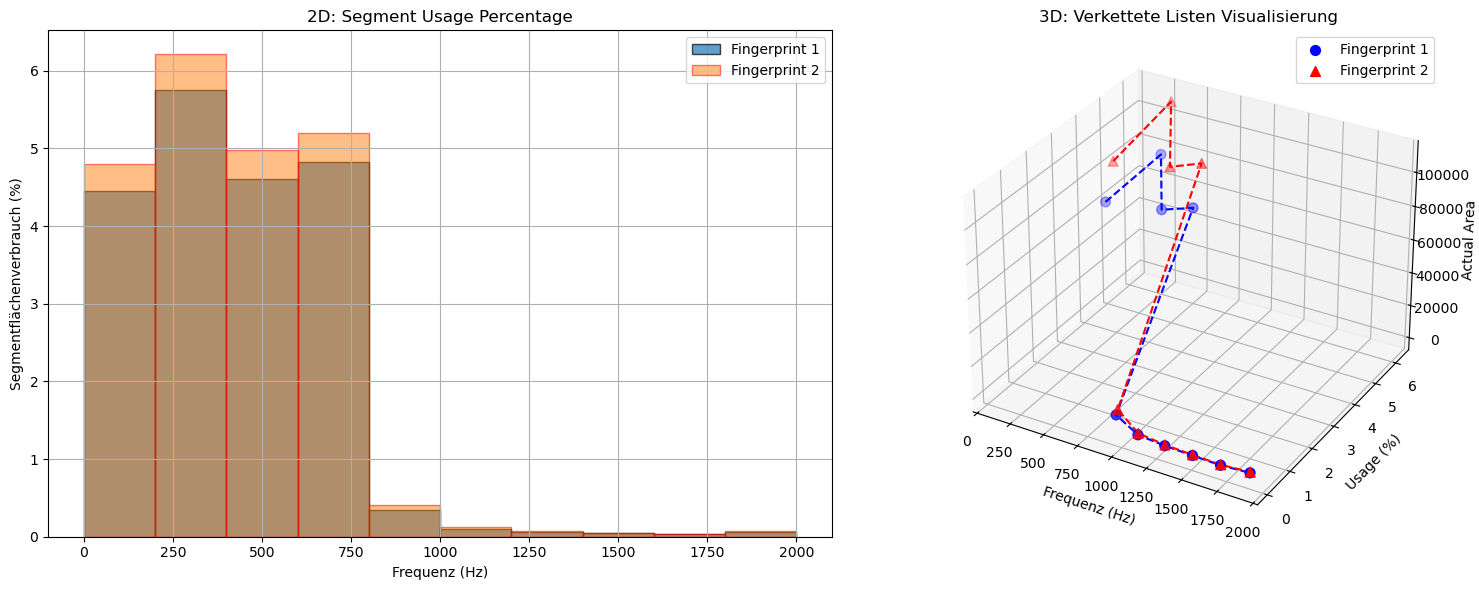

In [73]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Erforderlich für 3D-Plots

# --------------------- Daten einlesen ---------------------
# Beide Fingerprints werden aus denselben Dateien geladen
with open("fingerprint_local1.json", "r") as f:
    segments1 = json.load(f)

with open("fingerprint_local2.json", "r") as f:
    segments2 = json.load(f)

# --------------------- 2D-Plot: Vergleich der Segment Usage Percentage ---------------------
# Berechnung der Mittelpunkte, Breiten und usage_percent für Fingerprint 1
centers1 = [(seg["seg_start"] + seg["seg_end"]) / 2 for seg in segments1]
widths1  = [seg["seg_end"] - seg["seg_start"] for seg in segments1]
usage1   = [seg["usage_percent"] for seg in segments1]

# Berechnung der Mittelpunkte, Breiten und usage_percent für Fingerprint 2
centers2 = [(seg["seg_start"] + seg["seg_end"]) / 2 for seg in segments2]
widths2  = [seg["seg_end"] - seg["seg_start"] for seg in segments2]
usage2   = [seg["usage_percent"] for seg in segments2]

# --------------------- Funktion zur Extraktion der 3D-Koordinaten ---------------------
def extract_coordinates(segments):
    """
    Extrahiert aus den Segmentdaten die x-, y- und z-Koordinaten (Mittelpunkt, usage_percent, actual_area)
    sowie den Index, um die Daten anhand des Segmentindex zu sortieren.
    """
    x_vals, y_vals, z_vals, indices = [], [], [], []
    for seg in segments:
        mid_freq = (seg["seg_start"] + seg["seg_end"]) / 2
        x_vals.append(mid_freq)
        y_vals.append(seg["usage_percent"])
        z_vals.append(seg["actual_area"])
        indices.append(seg["index"])
    # Sortierung anhand des Segmentindex
    sorted_data = sorted(zip(indices, x_vals, y_vals, z_vals), key=lambda x: x[0])
    _, sorted_x, sorted_y, sorted_z = zip(*sorted_data)
    return sorted_x, sorted_y, sorted_z

# Extrahiere 3D-Koordinaten für beide Fingerprints
x1, y1, z1 = extract_coordinates(segments1)
x2, y2, z2 = extract_coordinates(segments2)

# --------------------- Erzeugen der Subplots ---------------------
fig = plt.figure(figsize=(16, 6))

# Linker Subplot: 2D-Plot
ax1 = fig.add_subplot(1, 2, 1)
if centers1 == centers2 and widths1 == widths2:
    # Überlagerte Balken: Fingerprint 1 mit höherer Transparenz
    ax1.bar(centers1, usage1, width=widths1, align='center', alpha=0.7, edgecolor='black', label='Fingerprint 1')
    ax1.bar(centers2, usage2, width=widths2, align='center', alpha=0.5, edgecolor='red', label='Fingerprint 2')
else:
    # Side-by-Side-Anordnung, falls die Segmentierung unterschiedlich ist
    bar_width = 0.4 * min(min(widths1), min(widths2))
    ax1.bar([c - bar_width/2 for c in centers1], usage1, width=bar_width, align='center', alpha=0.7, edgecolor='black', label='Fingerprint 1')
    ax1.bar([c + bar_width/2 for c in centers2], usage2, width=bar_width, align='center', alpha=0.7, edgecolor='red', label='Fingerprint 2')

ax1.set_xlabel("Frequenz (Hz)")
ax1.set_ylabel("Segmentflächenverbrauch (%)")
ax1.set_title("2D: Segment Usage Percentage")
ax1.grid(True)
ax1.legend()

# Rechter Subplot: 3D-Plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Fingerprint 1: Darstellung als blaue Kreise und gestrichelte Linie
ax2.scatter(x1, y1, z1, c='b', marker='o', s=50, label='Fingerprint 1')
ax2.plot(x1, y1, z1, color='b', linestyle='--')
# Fingerprint 2: Darstellung als rote Dreiecke und gestrichelte Linie
ax2.scatter(x2, y2, z2, c='r', marker='^', s=50, label='Fingerprint 2')
ax2.plot(x2, y2, z2, color='r', linestyle='--')

ax2.set_xlabel("Frequenz (Hz)")
ax2.set_ylabel("Usage (%)")
ax2.set_zlabel("Actual Area")
ax2.set_title("3D: Verkettete Listen Visualisierung")
ax2.legend()

plt.tight_layout()
plt.show()
